# Projective Transformation Estimation
This workbook deals with projective distortion in camera images and with estimating homographies between images. We are given two images, Figures 1a and 1b, we need to merge the two by estimating homography between them. In case you did not know, Figure 1b is a photo of Audrey Hepburn, one of the most famous movie stars.
<img src="../data/projective_distortion/hw1.jpg"> 

Let's' import necessary libraries

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

%matplotlib inline

Load the two images using opencv imread function

In [4]:
img1 = cv2.imread('../data/projective_distortion/Frame.jpg')
img2 = cv2.imread('../data/projective_distortion/Audrey.jpg')

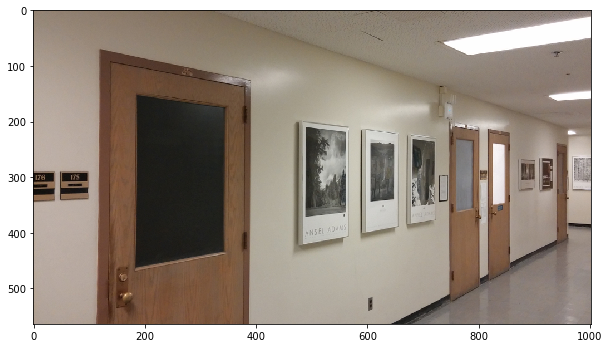

In [5]:
#Display the img1
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [ ]:
#try displaying img2

Create an image such that the face in Figure 1b is now placed inside the indicated frame PQRS in Figure 1a. This can be achieved by finding the homography from 1b to 1a. First let's draw selected region to visualize

In [6]:
##draw the selected region
img3= np.zeros((img1.shape[0],img1.shape[1],3),dtype='uint8')
pts = np.array([[186,152],[346,176],[342,433],[184,462]],np.int32)
pts = pts.reshape((-1,1,2))
cv2.fillPoly(img3,[pts],(255,255,255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
#try Displaying img3

In [8]:
## get the color of a pixel in photo from 'real painting'
def getcolor(point, img):
    """
    Utility to return color of the pixel at any given point in the image.
    Parameters:
    point : numpy array
        Point is a 2d vector representing pixel
    img : numpy array
        Image input to get the color
    """
    p =img[int(math.floor(point[0,0])%img.shape[0]),int(math.floor(point[0,1])%img.shape[1])]
    q =img[int(math.floor(point[0,0])%img.shape[0]),int(math.floor(point[0,1]+1)%img.shape[1])]
    r =img[int(math.floor(point[0,0]+1)%img.shape[0]),int(math.floor(point[0,1])%img.shape[1])]
    s =img[int(math.floor(point[0,0]+1)%img.shape[0]),int(math.floor(point[0,1]+1)%img.shape[1])]
    x = point[0,0] - math.floor(point[0,0])
    y = point[0,1] - math.floor(point[0,1])
    pweight= pow(pow(x,2)+pow(y,2),-0.5)
    qweight = pow(pow(x,2)+pow(1-y,2),-0.5)
    rweight = pow(pow(1-x,2)+pow(y,2),-0.5)
    sweight = pow(pow(1-x,2)+pow(1-y,2),-0.5)
    newpoint =(p*pweight+q*qweight+r*rweight+s*sweight)/(pweight+qweight+rweight+sweight)
    return newpoint

<img src="../data/projective_distortion/homography.jpg">

According to the above method first we are creating required variables for finding homography

In [9]:
##set up the P.Q.R.S and there corresponding points in img2
p = np.matrix('152 186 1',dtype=float)
q = np.matrix('176 346 1',dtype=float)
r = np.matrix('462 184 1',dtype=float)
s = np.matrix('433 342 1',dtype=float)
pr = np.matrix('0 0 1',dtype=float)
qr = np.matrix('0 0 1',dtype=float)
qr[0,1] = img2.shape[1]
rr = np.matrix('0 0 1',dtype=float)
rr[0,0] = img2.shape[0]
sr = np.matrix('0 0 1',dtype=float)
sr[0,0] = img2.shape[0]
sr[0,1] = img2.shape[1]
paraMatrix = np.zeros((8,8),dtype=float)
paraMatrix = np.matrix(paraMatrix,dtype=float)

Finding the Homography as discribed in the above section

In [10]:
#Transform: Photo => realFigure
##get ready for paraMatrix*parameter=Rvector
paraMatrix[0,0:3] = p
paraMatrix[0,6:9] = p[0,0:2]*(-1)*pr[0,0]
paraMatrix[1,3:6] = p
paraMatrix[1,6:9] = p[0,0:2]*(-1)*pr[0,1]
paraMatrix[2,0:3] = q
paraMatrix[2,6:9] = q[0,0:2]*(-1)*qr[0,0]
paraMatrix[3,3:6] = q
paraMatrix[3,6:9] = q[0,0:2]*(-1)*qr[0,1]
paraMatrix[4,0:3] = r
paraMatrix[4,6:9] = r[0,0:2]*(-1)*rr[0,0]
paraMatrix[5,3:6] = r
paraMatrix[5,6:9] = r[0,0:2]*(-1)*rr[0,1]
paraMatrix[6,0:3] = s
paraMatrix[6,6:9] = s[0,0:2]*(-1)*sr[0,0]
paraMatrix[7,3:6] = s
paraMatrix[7,6:9] = s[0,0:2]*(-1)*sr[0,1]
Rvector = np.matrix('0 0 0 0 0 0 0 0',dtype=float)
Rvector[0,0:2] = pr[0,0:2]
Rvector[0,2:4] = qr[0,0:2]
Rvector[0,4:6] = rr[0,0:2]
Rvector[0,6:8] = sr[0,0:2]

[[  1.33106671e+00  -1.99660007e-01  -1.65185379e+02]
 [  1.37967809e-02   2.13850103e+00  -3.99858303e+02]
 [ -5.27276221e-05  -8.83633997e-04   1.00000000e+00]]


we have all the necessary matrices ready 

In [ ]:
#Solve for the equation to get the parameters
#parameter = paraMatrix.I*Rvector.T

In [ ]:
parameter = parameter.T
H = np.zeros((3,3),dtype=float)
H[0] = parameter[0,0:3]
H[1] = parameter[0,3:6]
H[2,0:2] = parameter[0,6:8]
H[2,2] = 1
print(H)

Merge the img2 to img1 by move each and every point into the img1.

In [11]:
##get every pixel-on-the-door's new color
temp = np.matrix('0 0 1',dtype=float)
for row in range(0,img1.shape[0]):
  for column in range(0,img1.shape[1]):
    if img3[row,column,1] > 0:
      temp[0,0] = row
      temp[0,1] = column
      tr = H*temp.T
      tr = tr.T
      tr = tr/tr[0,2]
      img1[row,column]=getcolor(tr,img2)

Display the image

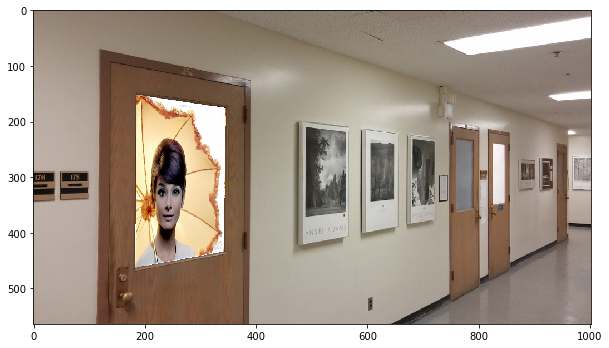

In [12]:
# convert image to RGB color for matplotlib
#img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img1_rgb)

In [14]:
print('The end!')

The end!
